In [1]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.autograd import Variable
import torch.nn.functional as F

import numpy as np

In [2]:
#get data

from data_utils import load_mnist

trX, teX, trY, teY = load_mnist(onehot=False)

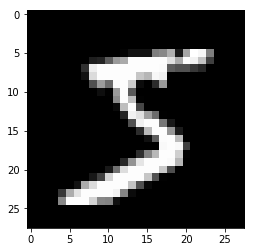

In [3]:
#view data

import matplotlib.pyplot as plt

plt.imshow(trX[0].reshape(28,28), cmap=plt.get_cmap('gray')) #need cmap thing or else is weird colour
plt.show()

In [4]:
#convert from numpy arrays to torch tensors

trX = torch.from_numpy(trX).float()
teX = torch.from_numpy(teX).float()
trY = torch.from_numpy(trY).long()
teY = torch.from_numpy(teY).long()

In [5]:
#create model

class Net(nn.Module):
    def __init__(self, input_size, hidden_size, output_size):
        super(Net, self).__init__()
        
        self.input_size = input_size
        self.hidden_size = hidden_size
        self.output_size = output_size
        
        self.i2h = nn.Linear(input_size, hidden_size)
        self.h2o = nn.Linear(hidden_size, output_size)
        
        self.logsoftmax = nn.LogSoftmax()
        
    def forward(self, x):
        x = F.relu(self.i2h(x))
        x = self.logsoftmax(self.h2o(x))
        return x

In [6]:
#create instance of Net class

net = Net(784, 100, 10)

In [7]:
#define some parameters

epochs = 10
batch_size = 32
learning_rate = 0.001
momentum = 0.9

In [8]:
#for plotting

plot_loss = []
plot_correct = []

In [9]:
#define loss and optimizer

criterion = nn.NLLLoss()
optimizer = optim.SGD(net.parameters(), lr=learning_rate, momentum=momentum)

In [10]:
#training function

def train(model, criterion, optimizer, x, y):
    x = Variable(x, requires_grad=False)
    y = Variable(y, requires_grad=False)
    
    # Reset gradient
    optimizer.zero_grad()

    # Forward
    fx = model.forward(x)
    loss = criterion(fx, y)

    # Backward
    loss.backward()

    # Update parameters
    optimizer.step()

    return loss.data[0]

In [11]:
#make predictions

def predict(model, x, y):
    x = Variable(x, requires_grad=False)
    outputs = model(x)
    _, predicted = torch.max(outputs.data, 1) #for each output, get the predicted value (torch.max returns (index, value) tuple)
    correct = (predicted == y) #how many predicted values equal the labels
    return correct.sum() 

In [12]:
#run the training

num_examples = trX.shape[0]
num_batches = num_examples // batch_size

for e in range(1, epochs+1):
    loss = 0.
    for k in range(num_batches):
        start, end = k * batch_size, (k + 1) * batch_size
        loss += train(net, criterion, optimizer, trX[start:end], trY[start:end])
    correct = predict(net, teX, teY)
    plot_loss.append(loss/num_batches)
    plot_correct.append(correct/teX.shape[0]*100)
    print("Epoch %02d, loss = %f, accuracy = %.2f%%" % (e, loss / num_batches, correct/teX.shape[0]*100))

Epoch 01, loss = 0.891718, accuracy = 89.12%
Epoch 02, loss = 0.380003, accuracy = 90.64%
Epoch 03, loss = 0.326668, accuracy = 91.66%
Epoch 04, loss = 0.297670, accuracy = 92.26%
Epoch 05, loss = 0.275319, accuracy = 92.66%
Epoch 06, loss = 0.256162, accuracy = 93.19%
Epoch 07, loss = 0.239262, accuracy = 93.53%
Epoch 08, loss = 0.224368, accuracy = 93.88%
Epoch 09, loss = 0.211277, accuracy = 94.17%
Epoch 10, loss = 0.199611, accuracy = 94.43%


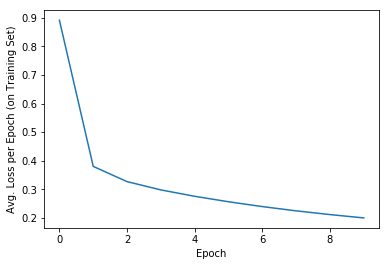

In [13]:
plt.plot(plot_loss)
plt.xlabel('Epoch')
plt.ylabel('Avg. Loss per Epoch (on Training Set)')
plt.show()

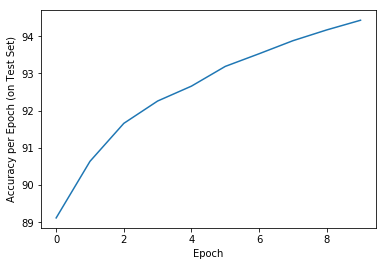

In [14]:
plt.plot(plot_correct)
plt.xlabel('Epoch')
plt.ylabel('Accuracy per Epoch (on Test Set)')
plt.show()